In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import tensorflow as tf
from tensorflow import keras
sns.set_style("darkgrid")

In [67]:
# Path for csv files
files_path ='../../notebooks/data_collection/'


# Num of trips
df = pd.read_csv(files_path + 'matrix.csv', index_col='StartDate')
df.index = pd.to_datetime(df.index)

In [68]:
df=df[['362']]

In [69]:
df

,362
StartDate,
2022-01-01 00:00:00,-6
2022-01-01 01:00:00,0
2022-01-01 02:00:00,-11
2022-01-01 03:00:00,5
2022-01-01 04:00:00,-1
...,...
2022-12-30 20:00:00,1
2022-12-30 21:00:00,1
2022-12-30 22:00:00,0


In [70]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-30 15:00:00', '2022-12-30 16:00:00',
               '2022-12-30 17:00:00', '2022-12-30 18:00:00',
               '2022-12-30 19:00:00', '2022-12-30 20:00:00',
               '2022-12-30 21:00:00', '2022-12-30 22:00:00',
               '2022-12-30 23:00:00', '2022-12-31 00:00:00'],
              dtype='datetime64[ns]', name='StartDate', length=8684, freq=None)

In [71]:
files_path2 ='../../../raw_data/data_1year/'

# Load features
features_preproc = pd.read_csv(files_path2 + 'final_features_preproc_12m.csv')
features_preproc.set_index(features_preproc.columns[0],inplace=True)

# Change 2s
features_preproc["event_title_nan"] = features_preproc["event_title_nan"].apply(lambda x: 1 if x>=1 else 0)

# Change names
features_preproc.rename(columns={"event_title_nan": "no_event"}, inplace=True)

#Drop Columns
features_preproc.drop(columns=['minute','second','London_zone_London_all'], inplace=True)

In [72]:
features_preproc

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,London_zone_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,0.429952,0.010204,0.0,1.0,0.108333,0.523677,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 01:00:00,0.427536,0.010204,0.0,1.0,0.330000,0.662953,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 02:00:00,0.427536,0.000000,0.0,1.0,0.310000,0.668524,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 03:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 04:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,0.729469,0.061224,0.0,2.0,0.383333,1.136490,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-01-01 20:00:00,0.685990,0.122449,0.0,2.0,0.246667,1.119777,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-01-01 21:00:00,0.676329,0.142857,0.0,2.0,0.190000,1.275766,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [73]:
features_preproc.index = pd.to_datetime(features_preproc.index)

In [74]:
df = df.join(features_preproc)

In [75]:
df=df.dropna()

In [78]:
df=df.rename(columns={'362':"nooftrips"})

In [79]:
# Converting the index as date
df.index = pd.to_datetime(df.index)

In [80]:
df

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
StartDate,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,0,0.429952,0.010204,0.0,1.00,0.108333,0.523677,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 01:00:00,0,0.427536,0.010204,0.0,1.00,0.330000,0.662953,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 02:00:00,4,0.427536,0.000000,0.0,1.00,0.310000,0.668524,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 03:00:00,0,0.427536,0.000000,0.0,1.00,0.283333,0.688022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 04:00:00,0,0.427536,0.000000,0.0,1.00,0.283333,0.688022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,1,0.396135,0.000000,0.0,0.76,0.401667,0.635097,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-12-30 21:00:00,1,0.388889,0.000000,0.0,1.00,0.380000,0.629526,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-12-30 22:00:00,0,0.384058,0.000000,0.0,1.00,0.388333,0.629526,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [81]:
df = df[['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction','weekday']]

In [82]:
df['hour'] = df.index.hour
df['weekday'] = df.index.dayofweek
df['day'] = df.index.day
df['month'] = df.index.month

/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_80368/681386165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_80368/681386165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df.index.dayofweek
/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_80368/681386165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [83]:
df.head()

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,weekday,hour,day,month
StartDate,,,,,,,,,,,
2022-01-02 00:00:00,0,0.429952,0.010204,0.0,1.0,0.108333,0.523677,6,0,2,1
2022-01-02 01:00:00,0,0.427536,0.010204,0.0,1.0,0.330000,0.662953,6,1,2,1
2022-01-02 02:00:00,4,0.427536,0.000000,0.0,1.0,0.310000,0.668524,6,2,2,1
2022-01-02 03:00:00,0,0.427536,0.000000,0.0,1.0,0.283333,0.688022,6,3,2,1
2022-01-02 04:00:00,0,0.427536,0.000000,0.0,1.0,0.283333,0.688022,6,4,2,1


<Axes: xlabel='StartDate', ylabel='nooftrips'>

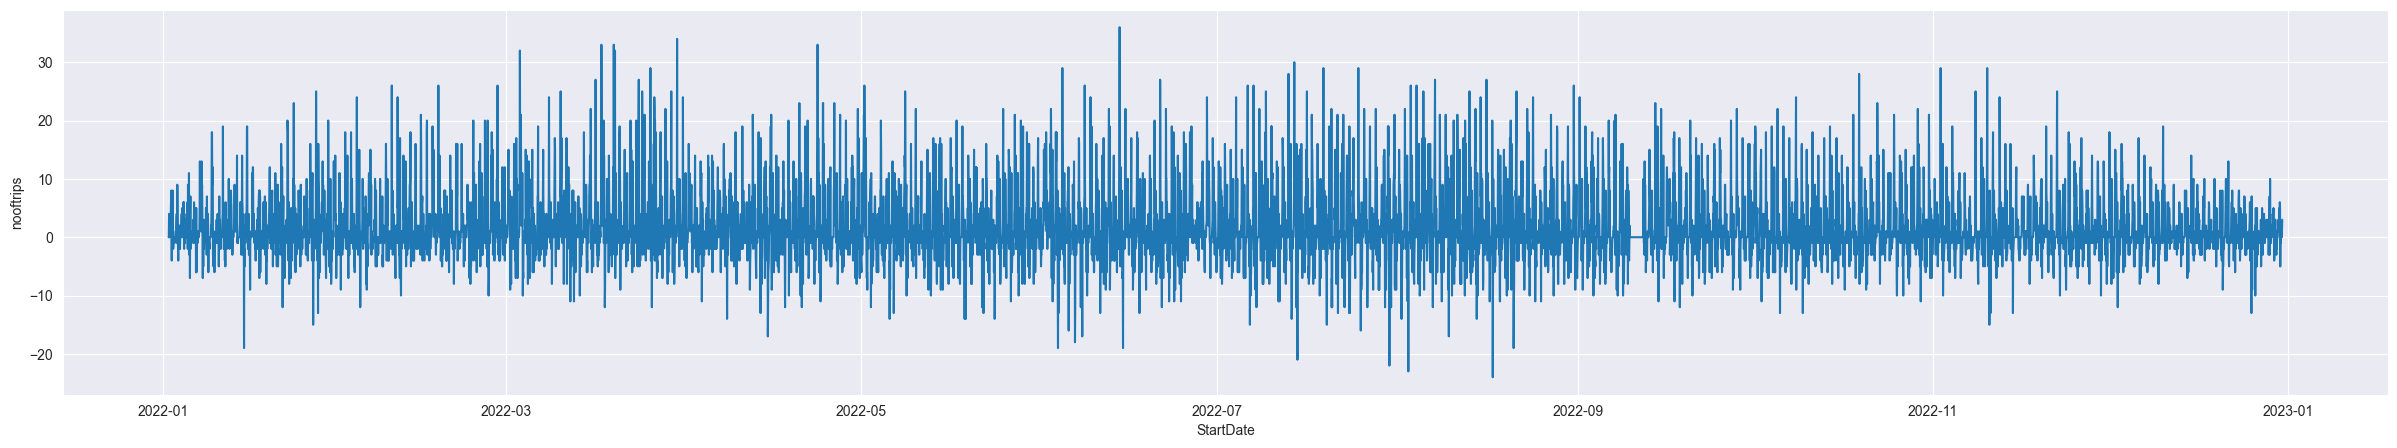

In [84]:
plt.figure(figsize=(30, 5))
sns.lineplot(x=df.index, y='nooftrips',data=df)

<Axes: xlabel='StartDate', ylabel='nooftrips'>

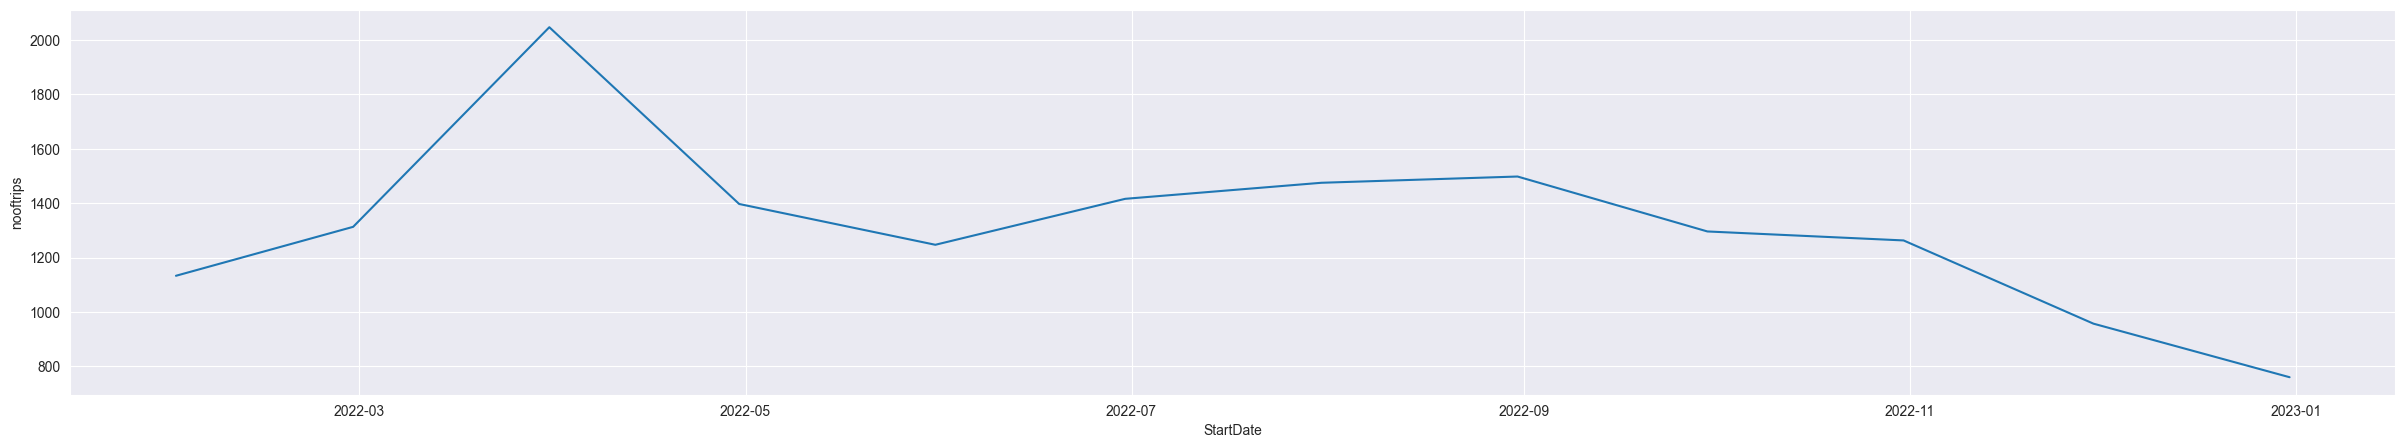

In [85]:
df_by_month = df.resample('M').sum()
plt.figure(figsize=(30,5))
sns.lineplot(x=df_by_month.index, y='nooftrips',data=df_by_month)

<Axes: xlabel='hour', ylabel='nooftrips'>

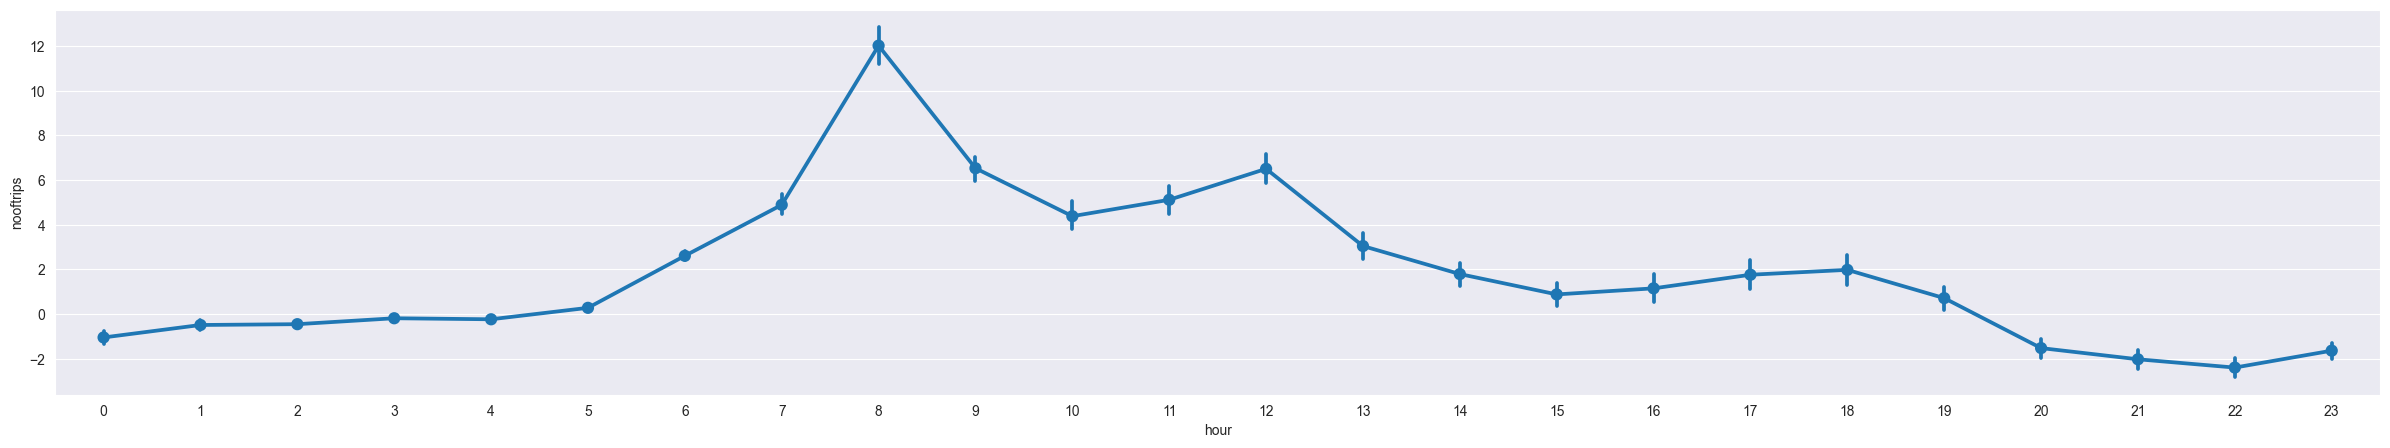

In [86]:
plt.figure(figsize=(30, 5))
sns.pointplot(x='hour', y='nooftrips',data=df)

<Axes: xlabel='weekday', ylabel='nooftrips'>

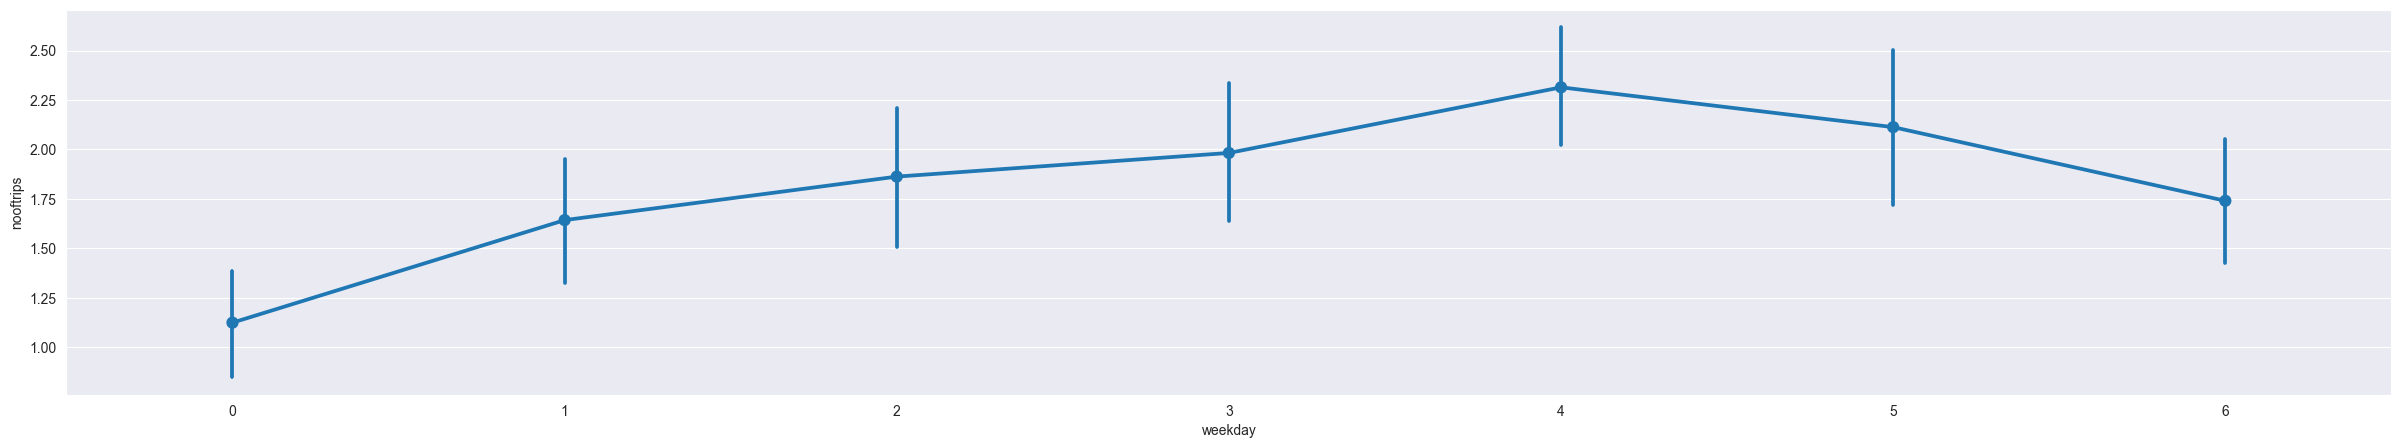

In [87]:
plt.figure(figsize=(30, 5))
sns.pointplot(x='weekday', y='nooftrips',data=df)

In [88]:
import math
# Get/Compute the number of rows to train the model on
training_data_len = math.ceil(len(df) *.9) # taking 90% of data to train and 10% of data to test
testing_data_len = len(df) - training_data_len

time_steps = 24
train, test = df.iloc[0:training_data_len], df.iloc[(training_data_len-time_steps):len(df)]
print(df.shape, train.shape, test.shape)

(8660, 11) (7794, 11) (890, 11)


In [89]:
from sklearn.preprocessing import RobustScaler

In [15]:
# # Scale the all of the data from columns ['t1', 't2', 'hum', 'wind_speed']
# train_trans = train[['t1', 't2', 'hum', 'wind_speed']].to_numpy()
# test_trans = test[['t1', 't2', 'hum', 'wind_speed']].to_numpy()
# Robust_scale = RobustScaler().fit(train_trans)
# train.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=Robust_scale.transform(train_trans)
# test.loc[:, ['t1', 't2', 'hum', 'wind_speed']]=Robust_scale.transform(test_trans)

In [90]:
#Scale the all of the data from columns ['nooftrips']
Robust_scale = RobustScaler().fit(train[['nooftrips']])
train['nooftrips'] = Robust_scale.transform(train[['nooftrips']])
test['nooftrips'] = Robust_scale.transform(test[['nooftrips']])

/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_80368/1192395762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['nooftrips'] = Robust_scale.transform(train[['nooftrips']])
/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_80368/1192395762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['nooftrips'] = Robust_scale.transform(test[['nooftrips']])


In [91]:
train.columns

Index(['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction', 'weekday', 'hour', 'day', 'month'],
      dtype='object')

In [92]:
train.to_numpy()
test.to_numpy()

array([[-4.00000000e-01,  3.35748792e-01,  0.00000000e+00, ...,
         2.30000000e+01,  2.30000000e+01,  1.10000000e+01],
       [-2.00000000e-01,  3.26086957e-01,  0.00000000e+00, ...,
         0.00000000e+00,  2.40000000e+01,  1.10000000e+01],
       [-2.00000000e-01,  3.18840580e-01,  0.00000000e+00, ...,
         1.00000000e+00,  2.40000000e+01,  1.10000000e+01],
       ...,
       [-2.00000000e-01,  3.84057971e-01,  0.00000000e+00, ...,
         2.20000000e+01,  3.00000000e+01,  1.20000000e+01],
       [ 0.00000000e+00,  3.76811594e-01,  1.02040816e-02, ...,
         2.30000000e+01,  3.00000000e+01,  1.20000000e+01],
       [ 4.00000000e-01,  7.53623188e-01,  0.00000000e+00, ...,
         0.00000000e+00,  3.10000000e+01,  1.20000000e+01]])

In [40]:
time_steps = 24

In [41]:
#Split the data into x_train and y_train data sets
X_train = []
y_train = []

for i in range(len(train) - time_steps):
    X_train.append(train.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    y_train.append(train.loc[:,'nooftrips'].iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

In [42]:
#Create the x_test and y_test data sets
X_test = []
y_test = df.loc[:,'nooftrips'].iloc[training_data_len:len(df)]

for i in range(len(test) - time_steps):
    X_test.append(test.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    #y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

In [43]:
# [samples, time_steps, n_features]
# Using all 12 columns of data (take out the bike sharing amount column) to make prediction
print('Train data size:')
print(X_train.shape, y_train.shape)
print('Test data size:')
print(X_test.shape, y_test.shape)

Train data size:
(7770, 24, 10) (7770,)
Test data size:
(866, 24, 10) (866,)


In [44]:
#Build the LSTM network model
model = keras.Sequential()
model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(units=50, activation='tanh',input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(keras.layers.Dense(35))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(20))
model.add(keras.layers.Dense(15))
model.add(keras.layers.Dense(units=1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-09-04 16:29:30.257727: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-04 16:29:30.257886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [45]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, restore_best_weights=True)

In [46]:
history = model.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.15, shuffle=True, callbacks=[es])

Epoch 1/50


2023-09-04 16:29:34.410444: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-04 16:29:36.648726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 16:29:36.962610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 16:29:36.990562: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 16:29:39.521607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 16:29:39.541956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


331/331 [==============================] - ETA: 0s - loss: 2.4559

2023-09-04 16:29:49.556879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 16:29:49.657672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 16:29:49.667691: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


331/331 [==============================] - 16s 32ms/step - loss: 2.4559 - val_loss: 1.4035
Epoch 2/50
331/331 [==============================] - 9s 27ms/step - loss: 2.3450 - val_loss: 1.1188
Epoch 3/50
331/331 [==============================] - 9s 28ms/step - loss: 2.3157 - val_loss: 1.0799
Epoch 4/50
331/331 [==============================] - 9s 28ms/step - loss: 2.3194 - val_loss: 1.1014
Epoch 5/50
331/331 [==============================] - 9s 28ms/step - loss: 2.2948 - val_loss: 1.1151
Epoch 6/50
331/331 [==============================] - 9s 28ms/step - loss: 2.2919 - val_loss: 1.0411
Epoch 7/50
331/331 [==============================] - 9s 28ms/step - loss: 2.2681 - val_loss: 1.0858
Epoch 8/50
331/331 [==============================] - 10s 29ms/step - loss: 2.2763 - val_loss: 1.0791
Epoch 9/50
331/331 [==============================] - 9s 28ms/step - loss: 2.2600 - val_loss: 1.0340
Epoch 10/50
331/331 [==============================] - 9s 28ms/step - loss: 2.2572 - val_loss: 1.072

In [47]:
y_pred = model.predict(X_test)
y_pred = Robust_scale.inverse_transform(y_pred)#Undo scaling
y_pred

2023-09-04 16:37:05.515496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 16:37:05.631720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 16:37:05.642509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 1s 23ms/step


array([[-8.74396503e-01],
       [-2.36111879e-01],
       [ 7.52951145e-01],
       [ 3.66805077e-01],
       [ 3.19773406e-01],
       [ 5.76732635e-01],
       [ 8.52630615e-01],
       [ 1.13553548e+00],
       [ 1.83043098e+00],
       [ 3.02260351e+00],
       [ 3.14873981e+00],
       [ 2.50377822e+00],
       [ 1.92169845e+00],
       [ 1.37859404e+00],
       [ 9.39046562e-01],
       [ 5.81810951e-01],
       [ 2.22296804e-01],
       [-2.40760803e-01],
       [-8.48429143e-01],
       [-1.38367820e+00],
       [-1.69328380e+00],
       [-1.68126404e+00],
       [-1.32007694e+00],
       [-7.26223946e-01],
       [-7.91973174e-01],
       [-1.13225117e-01],
       [ 7.89645553e-01],
       [ 3.57754886e-01],
       [ 3.40116471e-01],
       [ 6.39319599e-01],
       [ 9.71670568e-01],
       [ 1.25147152e+00],
       [ 1.73707891e+00],
       [ 2.85509276e+00],
       [ 3.24948072e+00],
       [ 2.64335036e+00],
       [ 1.99697673e+00],
       [ 1.47963750e+00],
       [ 9.4

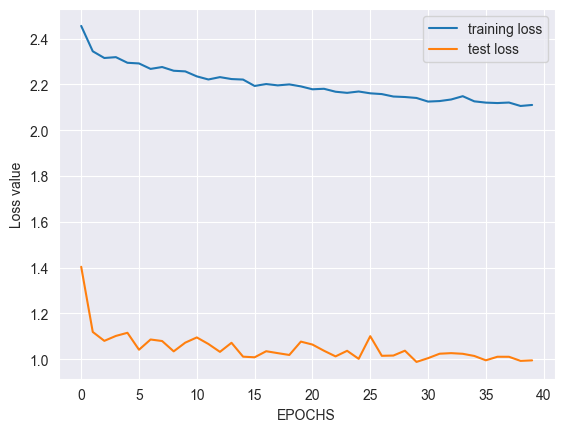

In [48]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

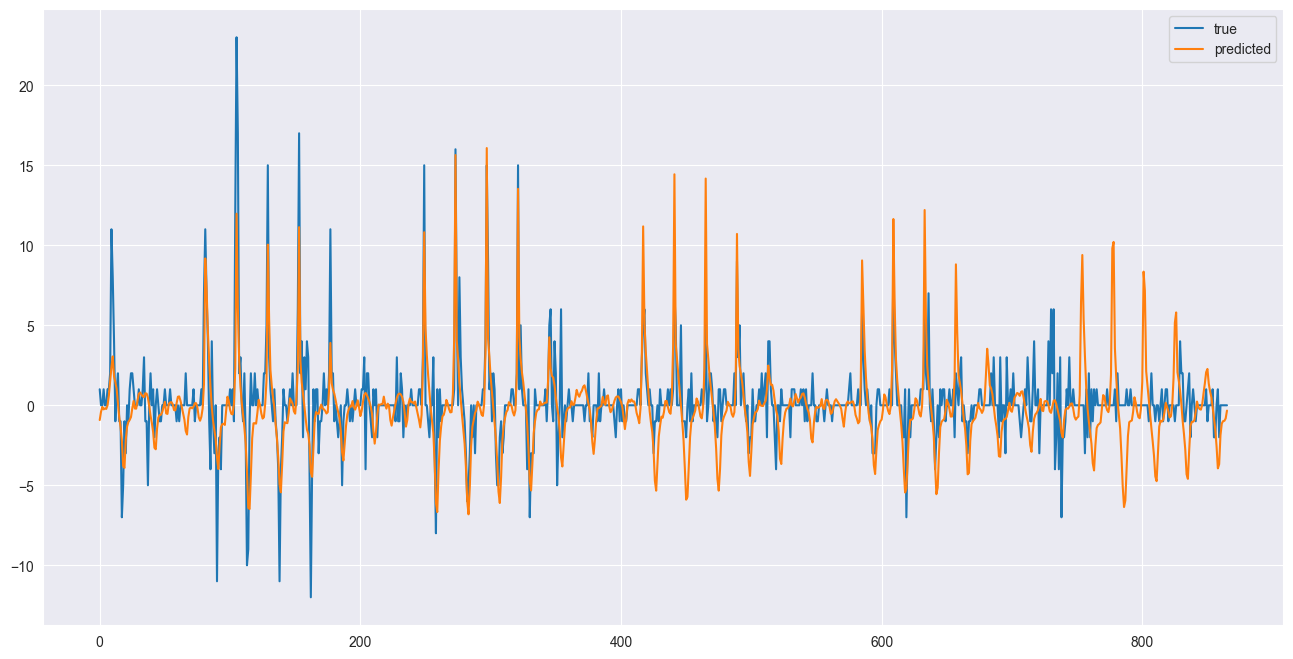

In [70]:
#Pcik some values to zoom in
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()